# Scikit-Learn Jupyer Notebook
*****
*****

<a name="top"></a>
# Scikit-Learn Jupyer Notebook <img align="right" src="https://raw.githubusercontent.com/martinaobrien/FUNDAMENTALS-OF-DATA-ANALYSIS-Project-2019/master/img/gmit_logo.jpg">
*****
*****

## Outline of this Notebook:

1. Overview of the scikit-learn package
2. Dataset: Penguin Dataset
    - Importing Packages for the Notebook
    - Exploring the Dataset
    - Preprocessing the Data
    - Data Visualisation
3. Train and Testing the Dataset
4. Data Modelling: Regression
    - Random Forest
    - Decision Tree
    - Naive Bayes
5. Comparison between models 
6. Conclusion
7. References

## 1. Overview of the scikit-learn library
******

### Defining Learning Problems with Scikit-Learn
***

The focus of machine learning is "acquiring skills or knowledge from experience"https://machinelearningmastery.com/types-of-learning-in-machine-learning/. Within the field itslef, there are many subfileds of study. The focus of this assessment is two main learning problems with Scikit-Learn. These are supervised and unsupervised learning.
<br>
<br>
**Supervised learning** occurs when the data"comes with additional attributes tht we want to predict"https://scikit-learn.org/stable/tutorial/basic/tutorial.html. The main aim is to assess and predict correlations of real world phenonema. The input and output are specified in this type of learning https://searchenterpriseai.techtarget.com/definition/machine-learning-ML
<br>
- **classification:** samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data. An example of a classification problem would be handwritten digit recognition, in which the aim is to assign each input vector to one of a finite number of discrete categories. Another way to think of classification is as a discrete (as opposed to continuous) form of supervised learning where one has a limited number of categories and for each of the n samples provided, one is to try to label them with the correct category or class.

- **regression:** if the desired output consists of one or more continuous variables, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.
<br>
**Unsupervised learning** involves algorithms "consists of a set of input vectors x without any corresponding target values.... goal in such problems may be to discover groups of similiar examples within the data or to determine the distribution of data" https://scikit-learn.org/stable/tutorial/basic/tutorial.html .he data and the recommendations generated from the algorithms are pre determined. https://searchenterpriseai.techtarget.com/definition/machine-learning-ML

## 2. Dataset: Penguin Dataset
******

### Importing packages
<br>

The Scikit-Learn package is built upon SciPy (Scientific Python) that most be installed beforehand https://machinelearningmastery.com/a-gentle-introduction-to-scikit-learn-a-python-machine-learning-library/c2. SciPy packages that will be used in this notebook are imported in the below code block alongwith the preferred plot modelling. 

In [71]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for all graphical and plotting purposes
import seaborn as sns
#import missingno as msno
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


import pandas as pd # numerical arrarys
import numpy as np # data frames
import matplotlib.pyplot as plt # plotting
import seaborn as sns # statistical plots
import sklearn.linear_model as ln # Logistic Regression
import sklearn.neighbors as nei # K nearest neighbours
import sklearn.model_selection as mod # helper functions
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [72]:
# Standard plot size.
plt.rcParams['figure.figsize'] = (15, 10)

# Standard colour scheme.
plt.style.use('ggplot')

In [73]:
df = pd.read_csv("penguins_size.csv") # reading in the dataset
df_Gaussian = pd.read_csv("penguins_size.csv")
df_Forest = pd.read_csv("penguins_size.csv")

### Exploring the Dataset

The Palmer Penguin dataset will be used in this project.https://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data/version/1?select=penguins_size.csv. In this section, the dataset is exploered at a higher level to establish any initial observations determine the scikit-learn packages that will be used and if there are any issues with the data that need to be resolved.

The below functions look at samples from the dataset, its composition and whether or not any datapoints are missing.  

In [74]:
df.shape

(344, 7)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [76]:
df.sample(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
99,Adelie,Dream,43.2,18.5,192.0,4100.0,MALE
34,Adelie,Dream,36.4,17.0,195.0,3325.0,FEMALE
70,Adelie,Torgersen,33.5,19.0,190.0,3600.0,FEMALE
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,MALE
89,Adelie,Dream,38.9,18.8,190.0,3600.0,FEMALE
60,Adelie,Biscoe,35.7,16.9,185.0,3150.0,FEMALE
16,Adelie,Torgersen,38.7,19.0,195.0,3450.0,FEMALE
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,FEMALE
129,Adelie,Torgersen,44.1,18.0,210.0,4000.0,MALE
164,Chinstrap,Dream,47.0,17.3,185.0,3700.0,FEMALE


In [77]:
print(df['species'].unique())

['Adelie' 'Chinstrap' 'Gentoo']


In [78]:
df["species"].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [79]:
print(df['island'].unique())

['Torgersen' 'Biscoe' 'Dream']


In [80]:
df["island"].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [81]:
df.describe() # important in prediction of the class later on

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


### Preprocessing the Data

#### Dealing with Nan within the dataset
<br>
From the initial analysis, there are null values within the dataset, this section explores this further and the potential impact it may have on the dataset.

In [82]:
df.isnull().values.any()

True

In [83]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [84]:
df.isnull().sum().sum() #https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/

19

In [85]:
# creating bool series True for NaN values https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/
bool_series = pd.isnull(df["sex"]) 
    
# filtering data 
# displaying data only with Gender = NaN 
df[bool_series]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [86]:
df.dropna(axis=0, how='all', subset=['sex'], inplace=True)
#it is decided that all rows with NaN will be dropped as gender may form part of the prediction process later on and these are incomplete datapoints

In [87]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [88]:
df.shape

(333, 7)

In [89]:
df["species"].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [90]:
df["island"].value_counts()

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64

### Data Visualisation

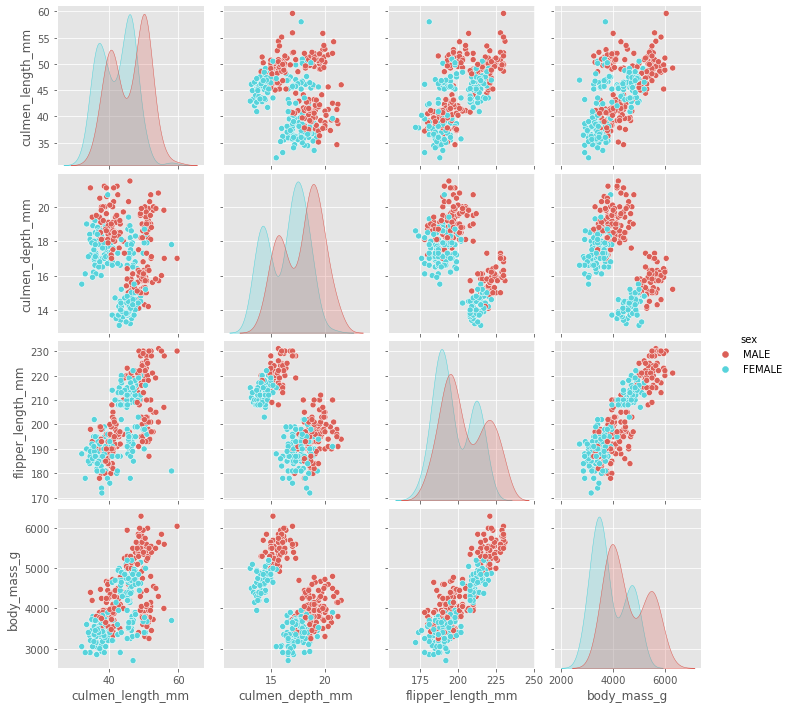

In [91]:
sns.pairplot(data=df, hue='sex', palette=sns.color_palette(palette='hls' ,n_colors=2))

Text(0, 0.5, 'Body Mass')

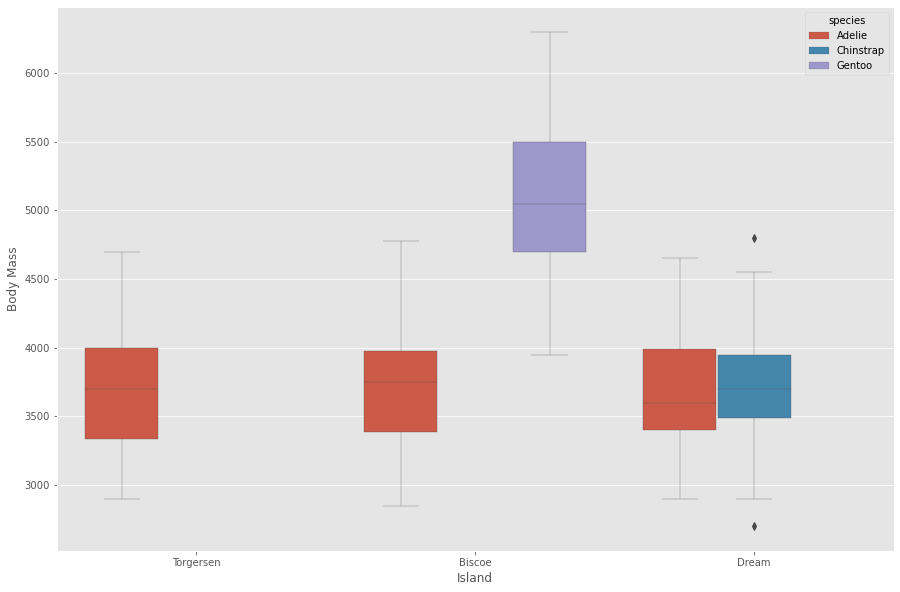

In [92]:
g = sns.boxplot(x = 'island',
            y ='body_mass_g',
            hue = 'species',
            data = df,
            linewidth=0.3)
g.set_xlabel('Island')
g.set_ylabel('Body Mass')

The above Pairplot provides an overview of the data and key information to inform the notebook can be ascertained. In this case, the Gentoo species seems to have more distinct feature from the other two species which can possible be used to predict the species later on. From an initial analysis of the data, Gentoo seems to have different attributes to the other species making it possible to predict a Gentoo penguin from the other two species. Adelie and Chinstrap are more similiar in their feature. Prediction of  each of the species from their attributes may be possible using measurements of the body mass and culmen length, culmen length and culmen depth and also flipper length and culmen length. The species, island and sex attributes will now be looked at to determine the prediction variable.  These will form the basis of the machine learning algorithms discussed and implemented in this notebook.

#### Correlation

From the above exploratory data anaylsis and subsequent preprocessing of the date, intial observations include: 
<br>
- Adelie is the most popular instance of penguin in the data set
- The Gentoo species appears to be distinguishable from the Adelie and Chinstrap species
- There appears to be a correlation between the flipper length and body mass for all penguins
- The culmen length and culmen depth in each of the species may be used as a way of predicting the species 
<br>

This section further explores the relationships between the variables in the penguin dataset.
- **Correlation** measures the strength and direction of linear realtionships between two variables https://towardsdatascience.com/let-us-understand-the-correlation-matrix-and-covariance-matrix-d42e6b643c22#:

*A coefficient of correlation is a value between -1 and +1 that denotes both the strength and directionality of a relationship between two variables. The closer the value is to 1 (or -1), the stronger a relationship. The closer a number is to 0, the weaker the relationship. A negative coefficient will tell us that the relationship is negative, meaning that as one value increases, the other decreases. Similarly, a positive coefficient indicates that as one value increases, as does the other.* https://datagy.io/python-correlation-matrix/

In [93]:
x = df.groupby('sex')
x.mean()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
sex,,,,
FEMALE,42.096970,16.425455,197.363636,3862.272727
MALE,45.854762,17.891071,204.505952,4545.684524


In [94]:
x = df.groupby('island')
x.mean()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
island,,,,
Biscoe,45.248466,15.907362,209.558282,4719.171779
Dream,44.221951,18.339837,193.186992,3718.902439
Torgersen,39.038298,18.451064,191.531915,3708.510638


In [95]:
x = df.groupby('sex')
x.mean()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
sex,,,,
FEMALE,42.096970,16.425455,197.363636,3862.272727
MALE,45.854762,17.891071,204.505952,4545.684524


A correlation matrix visually indicates the relationship between two variables for the data set as a whole. 

In [96]:
matrix = df.corr()
print(matrix)

                   culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
culmen_length_mm           1.000000        -0.228626           0.653096   
culmen_depth_mm           -0.228626         1.000000          -0.577792   
flipper_length_mm          0.653096        -0.577792           1.000000   
body_mass_g                0.589451        -0.472016           0.872979   

                   body_mass_g  
culmen_length_mm      0.589451  
culmen_depth_mm      -0.472016  
flipper_length_mm     0.872979  
body_mass_g           1.000000  


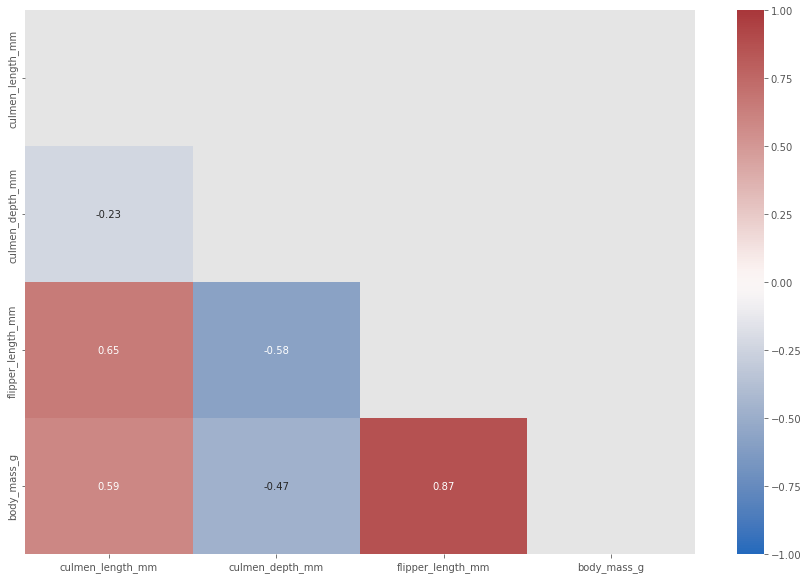

In [97]:
matrix = df.corr().round(2) #https://datagy.io/python-correlation-matrix/
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

The values in the matrix above range from 0 - 1 with flipper length and body mass having the strongest correlation when considering all the specieis of penguins.

## Train and Testing the Dataset

In [98]:
#Split our data in trainng and testing models
train, test = mod.train_test_split(df,test_size=.30, random_state=0) # https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/

In [99]:
train.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
165,Chinstrap,Dream,52.0,18.1,201.0,4050.0,MALE
156,Chinstrap,Dream,52.7,19.8,197.0,3725.0,MALE
112,Adelie,Biscoe,39.7,17.7,193.0,3200.0,FEMALE
220,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,FEMALE
96,Adelie,Dream,38.1,18.6,190.0,3700.0,FEMALE


In [100]:
test.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
62,Adelie,Biscoe,37.6,17.0,185.0,3600.0,FEMALE
60,Adelie,Biscoe,35.7,16.9,185.0,3150.0,FEMALE
283,Gentoo,Biscoe,54.3,15.7,231.0,5650.0,MALE
107,Adelie,Biscoe,38.2,20.0,190.0,3900.0,MALE
65,Adelie,Biscoe,41.6,18.0,192.0,3950.0,MALE


In [101]:
test.index.size

100

In [102]:
inputs, outputs = train[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']], train['sex']

In [103]:
inputs.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
165,52.0,18.1,201.0,4050.0
156,52.7,19.8,197.0,3725.0
112,39.7,17.7,193.0,3200.0
220,46.1,13.2,211.0,4500.0
96,38.1,18.6,190.0,3700.0


In [104]:
outputs.head()

165      MALE
156      MALE
112    FEMALE
220    FEMALE
96     FEMALE
Name: sex, dtype: object

The data will now be put into a two dimensional test-train split

In [105]:
train,test = mod.train_test_split(df)

In [106]:
train.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
99,Adelie,Dream,43.2,18.5,192.0,4100.0,MALE
208,Chinstrap,Dream,45.2,16.6,191.0,3250.0,FEMALE
266,Gentoo,Biscoe,45.5,13.9,210.0,4200.0,FEMALE
35,Adelie,Dream,39.2,21.1,196.0,4150.0,MALE
269,Gentoo,Biscoe,45.2,15.8,215.0,5300.0,MALE


In [107]:
test.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
226,Gentoo,Biscoe,45.4,14.6,211.0,4800.0,FEMALE
154,Chinstrap,Dream,51.3,19.2,193.0,3650.0,MALE
130,Adelie,Torgersen,38.5,17.9,190.0,3325.0,FEMALE
247,Gentoo,Biscoe,47.8,15.0,215.0,5650.0,MALE
151,Adelie,Dream,41.5,18.5,201.0,4000.0,MALE


In [108]:
test.index.size

84

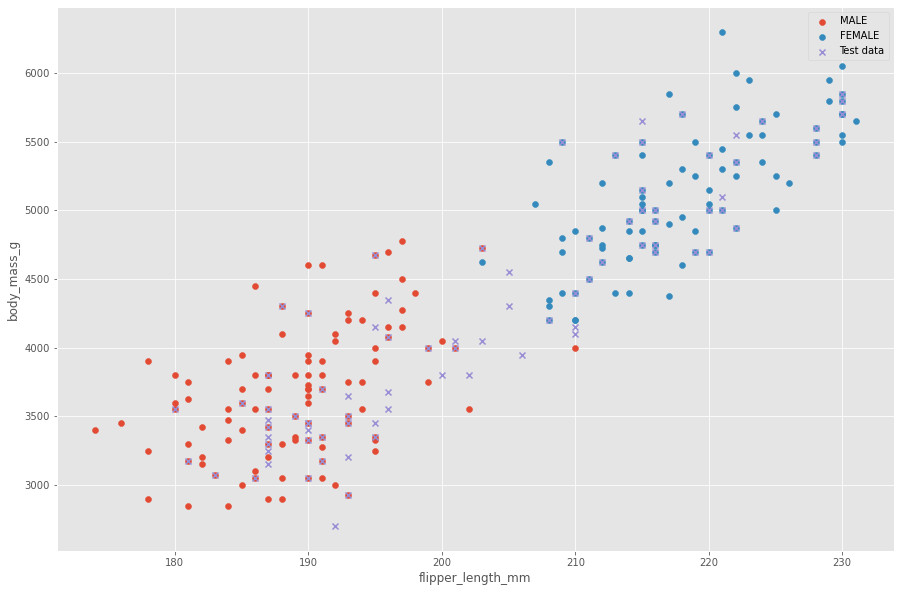

In [109]:
male = train[train['sex'] == 'MALE']
female = train[train['sex'] == 'FEMALE']

             
fig, ax = plt.subplots()
             
ax.scatter(ade['flipper_length_mm'], ade['body_mass_g'], marker='o', label='MALE')
ax.scatter(gen['flipper_length_mm'], gen['body_mass_g'], marker='o', label='FEMALE')
 
        
ax.scatter(test['flipper_length_mm'], test ['body_mass_g'], marker ='x', label= 'Test data')
        
ax.set_xlabel('flipper_length_mm')
ax.set_ylabel('body_mass_g')
ax.legend();

In [110]:
inputs, outputs = train[['flipper_length_mm', 'body_mass_g']], train['sex']

In [111]:
inputs.head()

,flipper_length_mm,body_mass_g
99,192.0,4100.0
208,191.0,3250.0
266,210.0,4200.0
35,196.0,4150.0
269,215.0,5300.0


In [112]:
outputs.head()

99       MALE
208    FEMALE
266    FEMALE
35       MALE
269      MALE
Name: sex, dtype: object

In [113]:
lre = ln.LogisticRegression(random_state=0)
lre.fit(inputs, outputs)

LogisticRegression(random_state=0)

In [114]:
predictions = lre.predict(test[['flipper_length_mm', 'body_mass_g']])
predictions

array(['MALE', 'FEMALE', 'FEMALE', 'MALE', 'FEMALE', 'MALE', 'MALE',
       'MALE', 'FEMALE', 'MALE', 'FEMALE', 'MALE', 'FEMALE', 'MALE',
       'FEMALE', 'MALE', 'FEMALE', 'FEMALE', 'MALE', 'MALE', 'FEMALE',
       'MALE', 'MALE', 'MALE', 'FEMALE', 'MALE', 'FEMALE', 'FEMALE',
       'FEMALE', 'FEMALE', 'FEMALE', 'FEMALE', 'MALE', 'FEMALE', 'FEMALE',
       'MALE', 'FEMALE', 'MALE', 'FEMALE', 'MALE', 'MALE', 'MALE',
       'FEMALE', 'FEMALE', 'MALE', 'MALE', 'MALE', 'MALE', 'MALE',
       'FEMALE', 'FEMALE', 'MALE', 'FEMALE', 'MALE', 'FEMALE', 'MALE',
       'MALE', 'FEMALE', 'FEMALE', 'FEMALE', 'FEMALE', 'FEMALE', 'MALE',
       'FEMALE', 'FEMALE', 'MALE', 'FEMALE', 'MALE', 'MALE', 'MALE',
       'FEMALE', 'MALE', 'FEMALE', 'MALE', 'MALE', 'MALE', 'FEMALE',
       'FEMALE', 'MALE', 'MALE', 'FEMALE', 'FEMALE', 'FEMALE', 'MALE'],
      dtype=object)

In [115]:
predictions == test['sex']

226    False
154    False
130     True
247     True
151    False
       ...  
291     True
104     True
134     True
167    False
51      True
Name: sex, Length: 84, dtype: bool

In [116]:
lre.score(test[['flipper_length_mm', 'body_mass_g']], test['sex'])

0.7142857142857143

In [117]:
test['predicted'] = predictions
test.head()


C:\Users\Owner1\AppData\Local\Temp/ipykernel_8184/3618166550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted'] = predictions


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,predicted
226,Gentoo,Biscoe,45.4,14.6,211.0,4800.0,FEMALE,MALE
154,Chinstrap,Dream,51.3,19.2,193.0,3650.0,MALE,FEMALE
130,Adelie,Torgersen,38.5,17.9,190.0,3325.0,FEMALE,FEMALE
247,Gentoo,Biscoe,47.8,15.0,215.0,5650.0,MALE,MALE
151,Adelie,Dream,41.5,18.5,201.0,4000.0,MALE,FEMALE


In [118]:
misclass = test[test['predicted'] != test['sex']]
misclass

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,predicted
226,Gentoo,Biscoe,45.4,14.6,211.0,4800.0,FEMALE,MALE
154,Chinstrap,Dream,51.3,19.2,193.0,3650.0,MALE,FEMALE
151,Adelie,Dream,41.5,18.5,201.0,4000.0,MALE,FEMALE
220,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,FEMALE,MALE
141,Adelie,Dream,40.6,17.2,187.0,3475.0,MALE,FEMALE
330,Gentoo,Biscoe,50.5,15.2,216.0,5000.0,FEMALE,MALE
210,Chinstrap,Dream,50.2,18.8,202.0,3800.0,MALE,FEMALE
179,Chinstrap,Dream,49.5,19.0,200.0,3800.0,MALE,FEMALE
125,Adelie,Torgersen,40.6,19.0,199.0,4000.0,MALE,FEMALE
212,Chinstrap,Dream,51.9,19.5,206.0,3950.0,MALE,FEMALE


In [119]:
train.groupby('sex').mean()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
sex,,,,
FEMALE,42.290083,16.390083,197.322314,3889.049587
MALE,45.337500,18.069531,202.726562,4475.390625


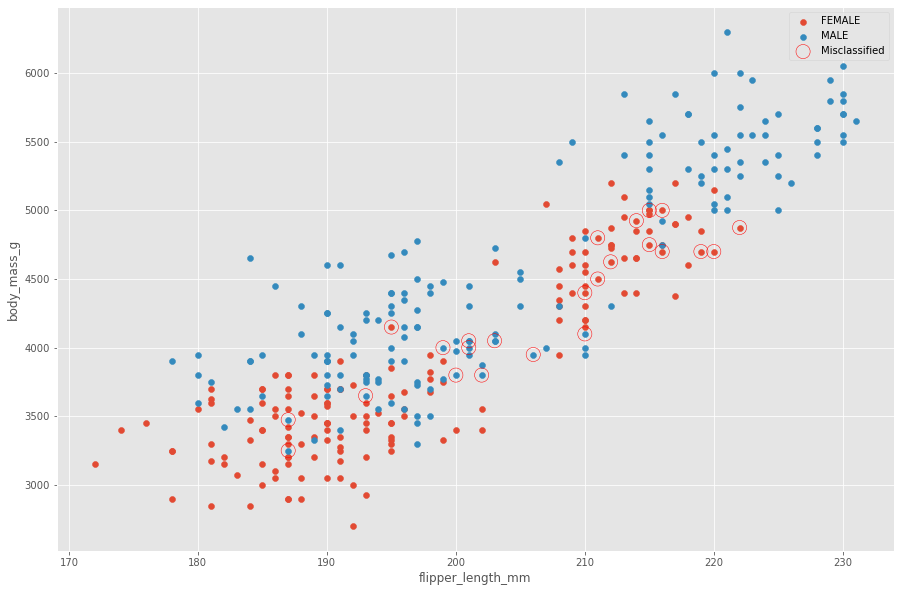

In [120]:
# New plot.
fig, ax = plt.subplots()

# Plot the training data
for species, data in df.groupby('sex'):
    ax.scatter(data['flipper_length_mm'], data['body_mass_g'], label=species)
    
# Plot misclassified.
ax.scatter(misclass['flipper_length_mm'], misclass['body_mass_g'], s=200, facecolor='none', edgecolor='r', label='Misclassified')

# Show the legend.
ax.set_xlabel('flipper_length_mm')
ax.set_ylabel('body_mass_g')
ax.legend();

In [121]:
# Split the data frame in two.
train, test = mod.train_test_split(df)

In [122]:
# Use all four possible inputs.
inputs, outputs = train[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']], train['sex']

In [123]:
# Create a new classifier.
lre = ln.LogisticRegression(random_state=0)

# Train the classifier on our data.
lre.fit(inputs, outputs)

LogisticRegression(random_state=0)

In [124]:
predictions = lre.predict(test[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']])
predictions

array(['FEMALE', 'FEMALE', 'MALE', 'FEMALE', 'FEMALE', 'MALE', 'MALE',
       'FEMALE', 'FEMALE', 'MALE', 'FEMALE', 'MALE', 'FEMALE', 'FEMALE',
       'FEMALE', 'MALE', 'FEMALE', 'MALE', 'MALE', 'FEMALE', 'MALE',
       'FEMALE', 'MALE', 'MALE', 'FEMALE', 'FEMALE', 'FEMALE', 'FEMALE',
       'FEMALE', 'MALE', 'FEMALE', 'FEMALE', 'FEMALE', 'FEMALE', 'MALE',
       'FEMALE', 'FEMALE', 'FEMALE', 'FEMALE', 'MALE', 'MALE', 'FEMALE',
       'MALE', 'MALE', 'MALE', 'MALE', 'FEMALE', 'MALE', 'FEMALE',
       'FEMALE', 'FEMALE', 'MALE', 'MALE', 'FEMALE', 'MALE', 'FEMALE',
       'MALE', 'FEMALE', 'FEMALE', 'MALE', 'MALE', 'FEMALE', 'FEMALE',
       'FEMALE', 'MALE', 'FEMALE', 'MALE', 'MALE', 'MALE', 'FEMALE',
       'FEMALE', 'FEMALE', 'MALE', 'MALE', 'MALE', 'MALE', 'FEMALE',
       'FEMALE', 'FEMALE', 'FEMALE', 'FEMALE', 'FEMALE', 'MALE', 'FEMALE'],
      dtype=object)

In [125]:
# Eyeball the misclassifications.
(predictions == test['sex']).value_counts()

True     66
False    18
Name: sex, dtype: int64

In [126]:
# What proportion were correct?
lre.score(test[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']], test['sex'])

0.7857142857142857

## Data Modelling: Classification and Regression
******

df.head()

x = df.iloc[:, 4:5].values 
#print(x)
y = df.iloc[:, 5].values
#print(y)

# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(x, y) 

Y_pred = regressor.predict(np.array([1.5]).reshape(1, 1))  # test the output by changing values

# Visualising the Random Forest Regression results
  
# arange for creating a range of values
# from min value of x to max 
# value of x with a difference of 0.01 
# between two consecutive values
X_grid = np.arange(min(x), max(x), 0.01) 
  
# reshape for reshaping the data into a len(X_grid)*1 array, 
# i.e. to make a column out of the X_grid value                  
X_grid = X_grid.reshape((len(X_grid), 1))
  
# Scatter plot for original data
plt.scatter(x, y, color = 'blue')  
  
# plot predicted data
plt.plot(X_grid, regressor.predict(X_grid), 
         color = 'green') 
plt.title('Random Forest Regression')
plt.xlabel('Culmen Depth')
plt.ylabel('Body Mass (g)')
plt.show()

df.head(10)

df.info()

X=df.iloc[:,1:5].values # https://www.kaggle.com/mainakchaudhuri/penguin-data-analysis#3.1-Random-Forest:
y=df.iloc[:,5].values

# select all rows by : and column 1
# by 1:2 representing features
X = df.iloc[:,4:5].astype(int) 
  
# print X
print(X)

# select all rows by : and column 2
# by 2 to Y representing labels
y = df.iloc[:, 2].astype(int) 
  
# print y
print(y)

# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X, y)

### Naive Bayes Gaussian Classification

In [127]:
import pandas as pd #https://www.youtube.com/watch?v=XqZmI5DxbeA
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [128]:
#df_Gaussian = pd.read_csv("penguins_size.csv")

In [129]:
print(df_Gaussian.head())

  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  


In [130]:
df_Gaussian.dropna(axis=0, how='all', subset=['sex'], inplace=True)
#it is decided that all rows with NaN will be dropped as gender may form part of the prediction process later on and these are incomplete datapoints

In [131]:
# drop irrelevant columns
df_Gaussian.drop(['species'], axis=1, inplace=True)
df_Gaussian.drop(['island'], axis=1, inplace=True)
print(df_Gaussian.head())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
4              36.7             19.3              193.0       3450.0  FEMALE
5              39.3             20.6              190.0       3650.0    MALE


In [132]:
X=df_Gaussian.iloc[:,:-1]
y=df_Gaussian.iloc[:,4]

In [133]:
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [134]:
y

0        MALE
1      FEMALE
2      FEMALE
4      FEMALE
5        MALE
        ...  
338    FEMALE
340    FEMALE
341      MALE
342    FEMALE
343      MALE
Name: sex, Length: 333, dtype: object

In [135]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [136]:
NBModel=GaussianNB()
NBModel.fit(X_train,y_train)

GaussianNB()

In [137]:
y_predicted=NBModel.predict(X_test)

In [138]:
y_predicted

array(['FEMALE', 'FEMALE', 'MALE', 'MALE', 'FEMALE', 'FEMALE', 'FEMALE',
       'FEMALE', 'MALE', 'FEMALE', 'MALE', 'FEMALE', 'FEMALE', 'FEMALE',
       'FEMALE', 'FEMALE', 'MALE', 'FEMALE', 'MALE', 'FEMALE', 'FEMALE',
       'FEMALE', 'MALE', 'FEMALE', 'FEMALE', 'MALE', 'MALE', 'FEMALE',
       'FEMALE', 'FEMALE', 'MALE', 'MALE', 'MALE', 'FEMALE', 'FEMALE',
       'MALE', 'FEMALE', 'FEMALE', 'FEMALE', 'MALE', 'MALE', 'FEMALE',
       'FEMALE', 'FEMALE', 'MALE', 'FEMALE', 'FEMALE', 'FEMALE', 'MALE',
       'MALE', 'FEMALE', 'FEMALE', 'MALE', 'MALE', 'FEMALE', 'FEMALE',
       'FEMALE', 'MALE', 'FEMALE', 'FEMALE', 'FEMALE', 'FEMALE', 'FEMALE',
       'FEMALE', 'FEMALE', 'MALE', 'FEMALE', 'MALE', 'MALE', 'MALE',
       'MALE', 'FEMALE', 'MALE', 'FEMALE', 'FEMALE', 'MALE', 'FEMALE',
       'FEMALE', 'MALE', 'FEMALE', 'FEMALE', 'FEMALE', 'MALE', 'MALE',
       'MALE', 'MALE', 'FEMALE', 'FEMALE', 'FEMALE', 'MALE', 'MALE',
       'MALE', 'FEMALE', 'MALE', 'MALE', 'FEMALE', 'FEMALE', 'MALE',


In [139]:
accuracy_score(y_test,y_predicted)*100

89.0

In [140]:
print(metrics.classification_report(y_test,y_predicted))
print(metrics.confusion_matrix(y_test,y_predicted))

NameError: name 'metrics' is not defined

In [ ]:
X_newval=np.array([51,16,222,5600])

In [ ]:
y_pred=NBModel.predict([X_newval])

In [ ]:
y_pred

### Support Vector Machine Classification

In [ ]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [ ]:
print(df.head())

In [ ]:
df = df.dropna()  #Drops all rows with at least one null value. 
D = df.values
x = D[:,2:6]
print(x)
y = D[:,6]
#print(y)
x_tr, x_ts, y_tr, y_ts = train_test_split(x,y,test_size=0.20,random_state=0)
model = SVC()
model.fit(x_tr,y_tr)

In [ ]:
predict_flower = model.predict(x_ts)
print("Accuracy: ",accuracy_score(y_ts, predict_flower))

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from sklearn.svm import SVC
# import pandas as pd

# #load dataset
# df = pd.read_csv("penguins_size.csv")
# df = df.dropna()
# print(df.head())

In [ ]:
# #drop irrelevant columns
# df.drop(['species'], axis=1, inplace=True)
# df.drop(['island'], axis=1, inplace=True)
# print(df.head())

In [ ]:
# D = df.values
# x = D[:,0:4]
# y = D[:,4]
# x_tr, x_ts, y_tr, y_ts = train_test_split(x, y, test_size=0.2)
# model = SVC()
# model.fit(x_tr,y_tr)

# #checking the accurarcy of SVM on test data
# predict_sex = model_predict(x_ts)
# print("Accuracy: ",accuracy_score(y_ts,predict_sex))
# #print(x_tr)

In [ ]:
#print(y_tr)

In [ ]:
# #classifying the training set using SVM
# model = SVC()
# model.fit(x_tr,y_tr)

# #checking the accurarcy of SVM on test data
# predict_sex = model_predict(x_ts)
# print("Accuracy: ",accuracy_score(y_ts,predict_sex))

### Random Forest Classification

In [ ]:
from pandas import read_csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# df_Forest = pd.read_csv("penguins_size.csv") # reading in the dataset
df_Forest = df_Forest.dropna()  #Drops all rows with at least one null value. 
print(df_Forest.head())

In [ ]:
sizes = df_Forest['sex'].value_counts(sort = 1)
print(sizes)

In [ ]:
df_Forest.drop(['species'], axis=1, inplace=True)
df_Forest.drop(['island'], axis=1, inplace=True)
print(df_Forest.head())

In [ ]:
df_Forest.sex[df_Forest.sex == 'MALE'] = 1
df_Forest.sex[df_Forest.sex == 'FEMALE'] = 2
print(df_Forest.head())

In [ ]:
Y = df_Forest["sex"].values  #At this point Y is an object not of type int
print(Y)

In [ ]:
Y=Y.astype('int')

In [ ]:
X = df_Forest.drop(labels = ["sex"], axis=1)
print(X.head())

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=20)
print(X_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 30, random_state = 0)
model.fit(X_train, y_train)

In [ ]:
prediction_test = model.predict(X_test)
print(y_test, prediction_test)

In [ ]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))

In [ ]:
feature_list = list(X.columns)
feature_imp = pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
print(feature_imp)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

https://github.com/mcnakhaee/palmerpenguins
decision tree classifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import FeatureUnion, make_pipeline
from sklearn.metrics import confusion_matrix
### To deal with missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeClassifier

X,y = load_penguins(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100,
                                            random_state=0)
imp = IterativeImputer(max_iter=10, random_state=0)
clf = make_pipeline(imp, DecisionTreeClassifier())
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred,labels=['Adelie','Chinstrap','Gentoo']))
array([[47,  1,  0],
       [ 3, 17,  0],
       [ 0,  0, 32]], dtype=int64)
print(clf.score(X_test,y_test))
0.96

In [ ]:
#print ("Features: ", df.feature_names)

## Comparison between Models
******

In [ ]:
import pingouin as pg # https://pingouin-stats.org/generated/pingouin.pairwise_gameshowell.html#pingouin.pairwise_gameshowell
df = pg.read_dataset('penguins')
pg.pairwise_gameshowell(data=df, dv='body_mass_g',
                        between='species').round(3)

## Conclusion
******

- Careful consideration must be taken for NaN values and their impact of the prediction results of a dataset. In this instance, all Nan values were excluded but further investigation may be conducted on the NaN values to determine if they are outliers or might influence the results drawn from the analysis.
- As the amount of species were not equal, it may have lead to unequal prediction within the sample, stratify can be included in the test and train model to ensure proportionate representatins in each group.

Scikit Learn is a Python library for machine learning, consisting of learning algorithms for machine learning and statistical modeling. The library was was initially developed by David Cournapeau in 2007 before being further developed by the FIRCA (French Institute for Research in Computer Science and Automation) leading to its first public realesae in 2010. https://www.tutorialspoint.com/scikit_learn/scikit_learn_introduction.htmScikit. It's popularity of use is largely due to ease of use, being open sourse, portable, powerful and wide ranging content and relative flexibility for use in Machine Learning projects. https://towardsdatascience.com/an-introduction-to-scikit-learn-the-gold-standard-of-python-machine-learning-e2b9238a98ab 

<br>

Scikit-Learn's purpose is data modellying and is easily integrated with other packages to provide data handling, manipulation and visualisation. It is built upon Python packages which include Numpy, SciPy Matplotlib. Pandas and Sci Py. The library provides methods of supervised and unsupervised learning algorithms including regression, classification and clustering of data. The library also offers other functions including ensemble methods, feature manipulation, outlier detection and model selection and validation. https://towardsdatascience.com/an-introduction-to-scikit-learn-the-gold-standard-of-python-machine-learning-e2b9238a98ab

## References

# End

*******